In [2]:
!pip install scikit-learn


In [4]:
# Load the news dataset
news_data = pd.read_csv("/Users/expert/Desktop/10-Academy-Week0/data/data.csv")

In [5]:
news_data.dropna(subset=['title'], inplace=True)

In [6]:
# Perform Keyword extraction using TF-IDF
# Extract keywords from headline/title
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
headline_tfidf = tfidf_vectorizer.fit_transform(news_data['title'])


In [7]:
# Extract keywords from news body
news_body_tfidf = tfidf_vectorizer.fit_transform(news_data['content'])

In [8]:
# Calculate similarity between keywords in headline/title and news body
keyword_similarity = cosine_similarity(headline_tfidf, news_body_tfidf)

In [9]:
# Perform Topic Modelling
# Clustering news articles by topics using KMeans
num_topics = 10
kmeans = KMeans(n_clusters=num_topics, random_state=42)
news_data['topic_cluster'] = kmeans.fit_predict(news_body_tfidf)

In [10]:
# Categorize title/content into known set of topic categories
# Here, we can analyze the distribution of topics and trends
topic_distribution = news_data['topic_cluster'].value_counts()

In [11]:
# Analyze which websites reported the most diverse topics
# Grouping by website and counting unique topic clusters
diverse_topics = news_data.groupby('source_name')['topic_cluster'].nunique().sort_values(ascending=False)

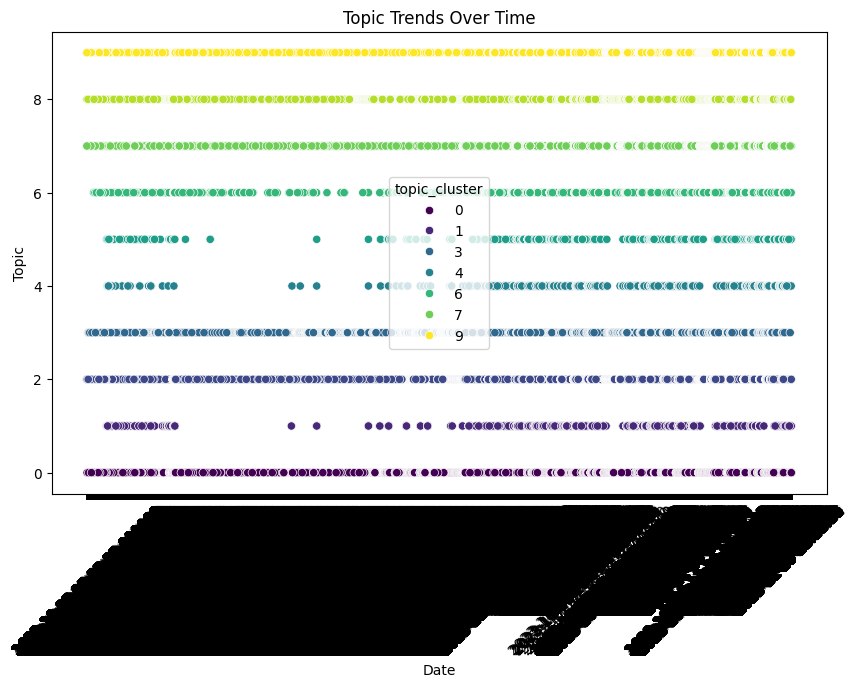

In [12]:
# Analyze topic trends over time
# Plot a 2D scatter plot with date on x-axis, topic on y-axis, and color representing topic count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='published_at', y='topic_cluster', data=news_data, hue='topic_cluster', palette='viridis')
plt.title('Topic Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Topic')
plt.xticks(rotation=45)
plt.show()

In [13]:
import seaborn as sns